In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout


<h1>Importing Dataset</h1>

In [18]:
google=pd.read_csv(r"C:\Users\raila\Desktop\Code\Py\Bharat\Google_train_data.csv")
google.head

<bound method NDFrame.head of             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]>

# Getting Information on Non-Null Values

In [19]:
google.info

<bound method DataFrame.info of             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]>

In [20]:
google["Close"]=pd.to_numeric(google.Close, errors='coerce') 
google = google.dropna() 
trainData = google.iloc[:,4:5].values

In [21]:
google.info

<bound method DataFrame.info of             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1149 rows x 6 columns]>

In [22]:
sc = MinMaxScaler (feature_range=(0,1)) 
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [24]:
X_train = []
y_train = []

for i in range (60,1149): #60 timestep // 1149: Length of the data X_train.append(trainData[i-60: 1,0])
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train), np.array(y_train)

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1)) #adding the X_train.shape
X_train.shape

(1089, 60, 1)

In [26]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [27]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 12s - loss: 0.0414 - 12s/epoch - 354ms/step
Epoch 2/20
35/35 - 5s - loss: 0.0113 - 5s/epoch - 136ms/step
Epoch 3/20
35/35 - 5s - loss: 0.0100 - 5s/epoch - 136ms/step
Epoch 4/20
35/35 - 6s - loss: 0.0088 - 6s/epoch - 169ms/step
Epoch 5/20
35/35 - 5s - loss: 0.0088 - 5s/epoch - 144ms/step
Epoch 6/20
35/35 - 5s - loss: 0.0080 - 5s/epoch - 137ms/step
Epoch 7/20
35/35 - 5s - loss: 0.0068 - 5s/epoch - 157ms/step
Epoch 8/20
35/35 - 5s - loss: 0.0065 - 5s/epoch - 150ms/step
Epoch 9/20
35/35 - 5s - loss: 0.0078 - 5s/epoch - 137ms/step
Epoch 10/20
35/35 - 5s - loss: 0.0070 - 5s/epoch - 156ms/step
Epoch 11/20
35/35 - 5s - loss: 0.0059 - 5s/epoch - 146ms/step
Epoch 12/20
35/35 - 5s - loss: 0.0061 - 5s/epoch - 153ms/step
Epoch 13/20
35/35 - 5s - loss: 0.0067 - 5s/epoch - 149ms/step
Epoch 14/20
35/35 - 5s - loss: 0.0316 - 5s/epoch - 153ms/step
Epoch 15/20
35/35 - 6s - loss: 0.0087 - 6s/epoch - 174ms/step
Epoch 16/20
35/35 - 6s - loss: 0.0066 - 6s/epoch - 167ms/step
Epoch 17/20
35/

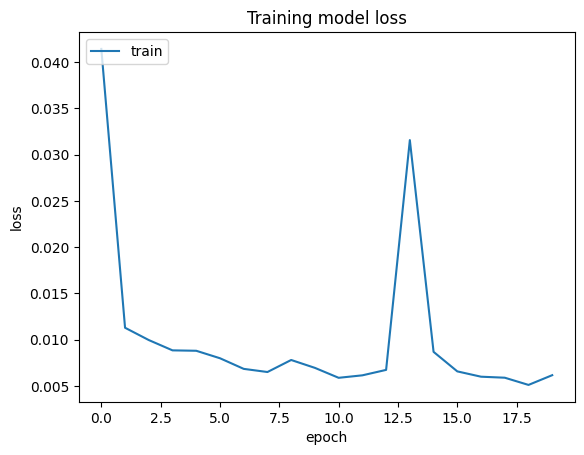

In [28]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Testing

In [30]:
testData = pd.read_csv(r'C:\Users\raila\Desktop\Code\Py\Bharat\Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [34]:
predicted_price = sc.inverse_transform(y_pred)

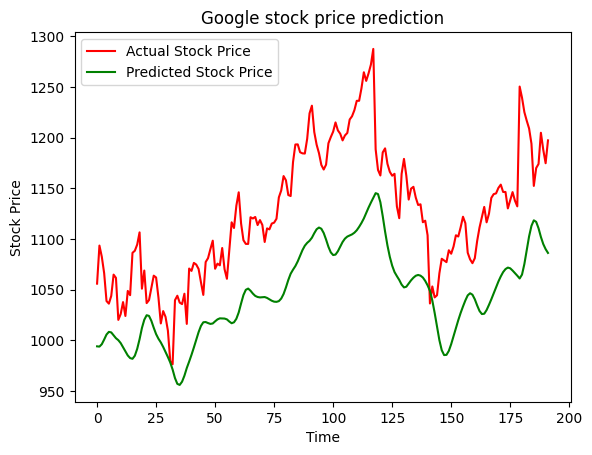

In [35]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()